<a href="https://colab.research.google.com/github/sahu-vishal/Email-Campaign-Effectiveness-Prediction/blob/main/Email_Campaign_Effectiveness_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Title : Email Campaign Effectiveness Prediction**

##**Problem Description**

Most of the small to medium business owners are making effective use of Gmail-based
Email marketing Strategies for offline targeting of converting their prospective customers into
leads so that they stay with them in business.
The main objective is to create a machine learning model to characterize the mail and track
the mail that is ignored; read; acknowledged by the reader.
Data columns are self-explanatory.

##**Business Context**
Email marketing is the act of sending a commercial message, typically to a group of people, using email. In its broadest sense, every email sent to a potential or current customer could be considered email marketing. It involves using email to send advertisements, request business, or solicit sales or donations. Email marketing strategies commonly seek to achieve one or more of three primary objectives, to build loyalty, trust, or brand awareness. The term usually refers to sending email messages with the purpose of enhancing a merchant's relationship with current or previous customers, encouraging customer loyalty and repeat business, acquiring new customers or convincing current customers to purchase something immediately, and sharing third-party ads.

## **Data Description**
* **Email Id** - It contains the email id's of the customers/individuals
* **Email Type** - There are two categories 1 and 2. We can think of them as marketing emails or important updates, notices like emails regarding the business.
* **Subject Hotness Score** - It is the email's subject's score on the basis of how good and effective the content is.
* **Email Source** - It represents the source of the email like sales and marketing or important admin mails related to the product.
* **Email Campaign Type** - The campaign type of the email.
* **Total Past Communications** - This column contains the total previous mails from the same source, the number of communications had.
* **Customer Location** - Contains demographical data of the customer, the location where the customer resides.
* **Time Email sent Category** - It has three categories 1,2 and 3; the time of the day when the email was sent, we can think of it as morning, evening and night time slots.
* **Word Count** - The number of words contained in the email.
* **Total links** - Number of links in the email.
* **Total Images** - Number of images in the email.
* **Email Status** - Our target variable which contains whether the mail was ignored, read, acknowledged by the reader.

## **Data Collection and Preprocessing**

### Importing

In [ ]:
# Importing important libraries and modules
# For data reading and manipulation
import pandas as pd
import numpy as np

# For data visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.rcParams.update({'figure.figsize':(8,5),'figure.dpi':100})

# VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Modelling
# Train-Test Split
from sklearn.model_selection import train_test_split
# Grid Search for Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV

# Metrics
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, roc_auc_score, f1_score, recall_score,roc_curve, classification_report

# To ignore warnings
import warnings    
warnings.filterwarnings('ignore')

In [ ]:
# Reading the csv dataset
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/PROJECTS/Supervised ML - Classification/data_email_campaign.csv')

### Data Inspection

In [ ]:
# Size of the data
df.shape

(68353, 12)

In [ ]:
# First look of our dataset
df.head()

,Email_ID,Email_Type,Subject_Hotness_Score,Email_Source_Type,Customer_Location,Email_Campaign_Type,Total_Past_Communications,Time_Email_sent_Category,Word_Count,Total_Links,Total_Images,Email_Status
0,EMA00081000034500,1,2.2,2,E,2,33.0,1,440,8.0,0.0,0
1,EMA00081000045360,2,2.1,1,NaN,2,15.0,2,504,5.0,0.0,0
2,EMA00081000066290,2,0.1,1,B,3,36.0,2,962,5.0,0.0,1
3,EMA00081000076560,1,3.0,2,E,2,25.0,2,610,16.0,0.0,0
4,EMA00081000109720,1,0.0,2,C,3,18.0,2,947,4.0,0.0,0


In [ ]:
# Basic info of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68353 entries, 0 to 68352
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Email_ID                   68353 non-null  object 
 1   Email_Type                 68353 non-null  int64  
 2   Subject_Hotness_Score      68353 non-null  float64
 3   Email_Source_Type          68353 non-null  int64  
 4   Customer_Location          56758 non-null  object 
 5   Email_Campaign_Type        68353 non-null  int64  
 6   Total_Past_Communications  61528 non-null  float64
 7   Time_Email_sent_Category   68353 non-null  int64  
 8   Word_Count                 68353 non-null  int64  
 9   Total_Links                66152 non-null  float64
 10  Total_Images               66676 non-null  float64
 11  Email_Status               68353 non-null  int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 6.3+ MB


In [ ]:
# Description of the data
df.describe()

,Email_Type,Subject_Hotness_Score,Email_Source_Type,Email_Campaign_Type,Total_Past_Communications,Time_Email_sent_Category,Word_Count,Total_Links,Total_Images,Email_Status
count,68353.000000,68353.000000,68353.000000,68353.000000,61528.000000,68353.000000,68353.000000,66152.000000,66676.000000,68353.000000
mean,1.285094,1.095481,1.456513,2.272234,28.933250,1.999298,699.931751,10.429526,3.550678,0.230934
std,0.451462,0.997578,0.498109,0.468680,12.536518,0.631103,271.719440,6.383270,5.596983,0.497032
min,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,40.000000,1.000000,0.000000,0.000000
25%,1.000000,0.200000,1.000000,2.000000,20.000000,2.000000,521.000000,6.000000,0.000000,0.000000
50%,1.000000,0.800000,1.000000,2.000000,28.000000,2.000000,694.000000,9.000000,0.000000,0.000000
75%,2.000000,1.800000,2.000000,3.000000,38.000000,2.000000,880.000000,14.000000,5.000000,0.000000
max,2.000000,5.000000,2.000000,3.000000,67.000000,3.000000,1316.000000,49.000000,45.000000,2.000000


In [ ]:
df.isnull().mean()*100

Email_ID                      0.000000
Email_Type                    0.000000
Subject_Hotness_Score         0.000000
Email_Source_Type             0.000000
Customer_Location            16.963411
Email_Campaign_Type           0.000000
Total_Past_Communications     9.984931
Time_Email_sent_Category      0.000000
Word_Count                    0.000000
Total_Links                   3.220049
Total_Images                  2.453440
Email_Status                  0.000000
dtype: float64

From the above data it cab be observed that 4 features have null values.\
● Customer_Location\
● Total_past_communications\
● Total_Links\
● Total_Images\
We will be handling it in the upcoming Data Cleaning section.

In [ ]:
# Looking for duplicates
df.duplicated().sum()

0

There are no duplicates in the dataset.

## **Exploratory Data Analysis**

### Categorical Data

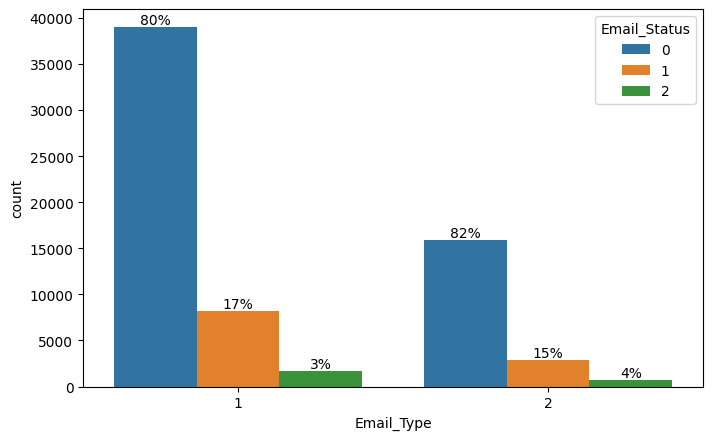

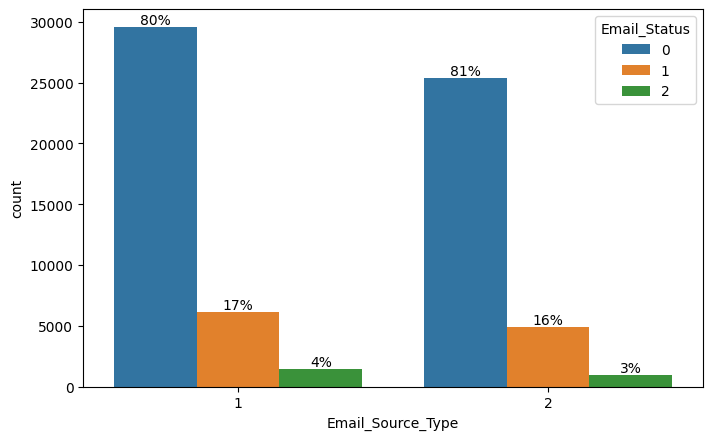

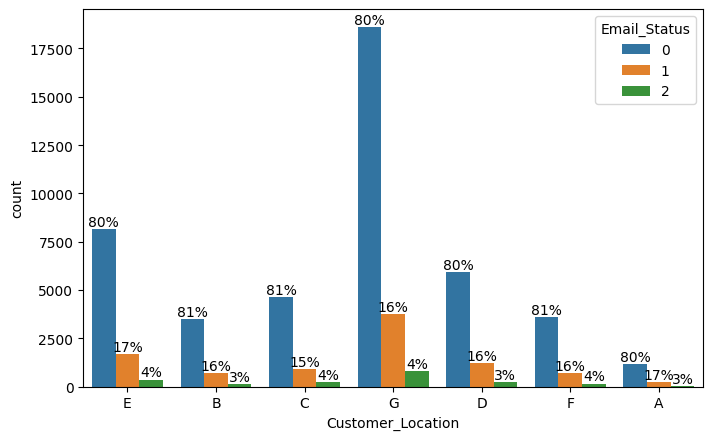

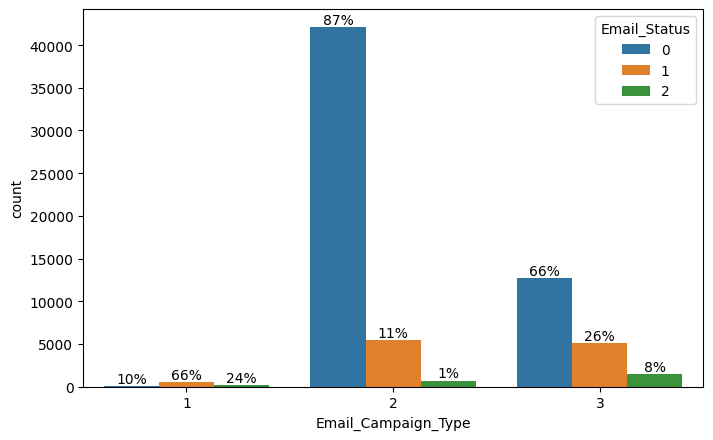

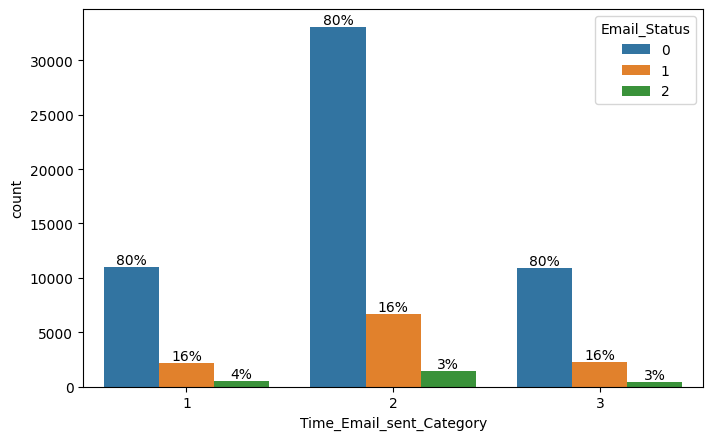

In [ ]:
#starting with categorical variables
categorical_variables = ['Email_Type','Email_Source_Type','Customer_Location','Email_Campaign_Type','Time_Email_sent_Category']
Target_variable = ['Email_Status']

for i,value in enumerate(categorical_variables):
  ax = sns.countplot(x=df[value], hue=df[Target_variable[0]])
  unique = len([x for x in df[value].unique() if x==x])
  # Bars are created in hue order
  bars = ax.patches
  for i in range(unique):
      catbars=bars[i:][::unique]
      #get height
      total = sum([x.get_height() for x in catbars])
      # Print percentage on the bars
      for bar in catbars:
        ax.text(bar.get_x()+bar.get_width()/2.,
                    bar.get_height(),
                    f'{bar.get_height()/total:.0%}',
                    ha="center",va="bottom")
  plt.show()

As it can observed that the distribution of Email_Status is almost similar in all the categories except in Email_Campaign_Type, it shows a totally different trend. For Email_Campaign_Type = 1 it's only 10% of the customers who are ignoring the email and for 2 around 87% customer ignore the emails.

### Continuous Data

#### Univariate

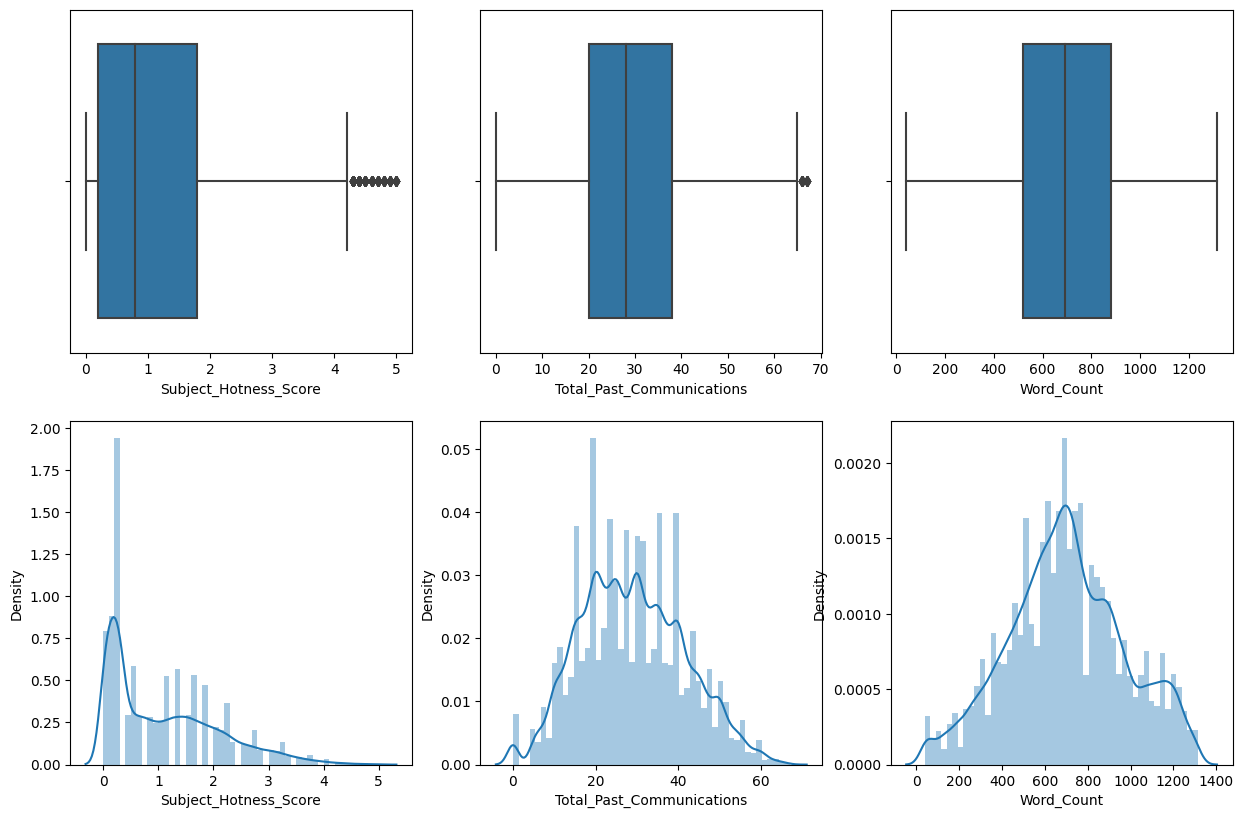

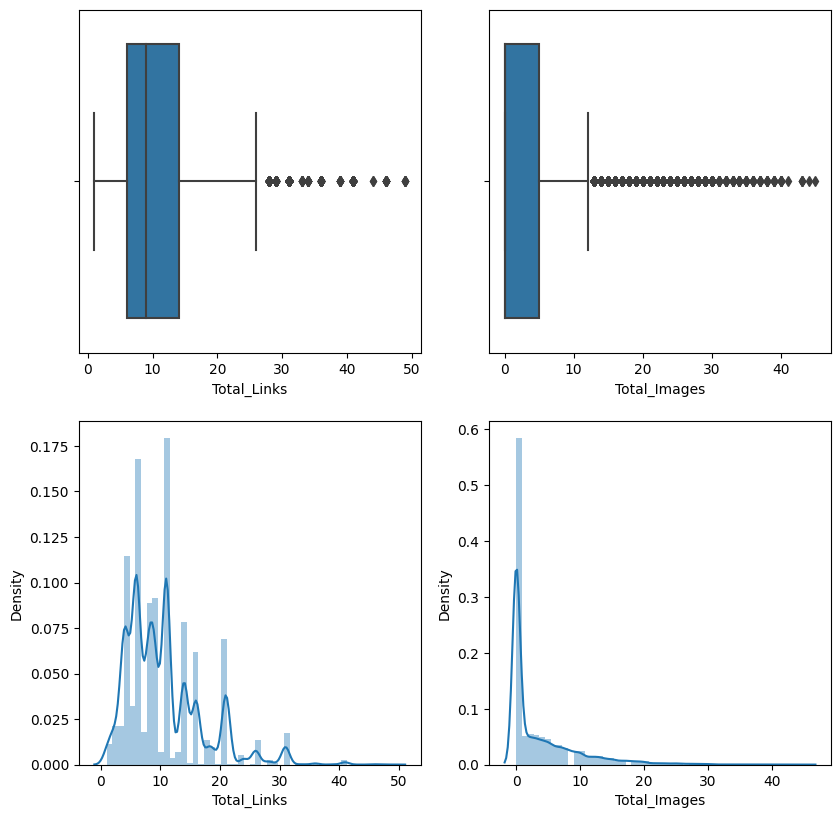

In [ ]:
#continuous variables
continuous_variables = ['Subject_Hotness_Score', 'Total_Past_Communications','Word_Count','Total_Links','Total_Images']
i = 1
fig = plt.figure(figsize = (15,10))
for c in list(continuous_variables):
    if i <= 3:
            ax1 = fig.add_subplot(2,3,i)
            sns.boxplot(data = df, x=c, ax = ax1)
            ax2 = fig.add_subplot(2,3,i+3)
            sns.distplot(df[c], ax=ax2)
            
    i += 1
    if i == 4: 
        fig = plt.figure(figsize = (15,10))
        i = 1

it's evident that **Word Count** and **Total_Past Communications** follow almost a **normal distribution**. The rest of the features were **highly skewed** to the **left**.

#### Bivariate

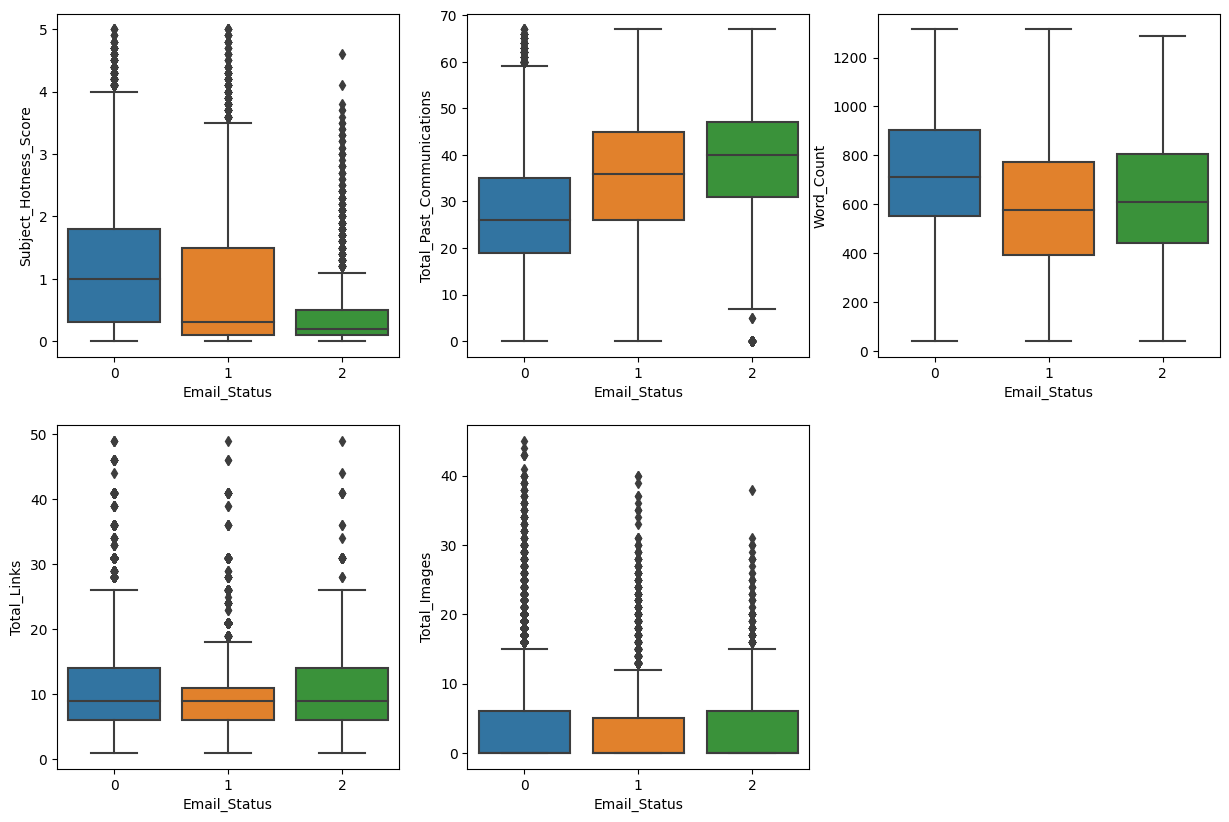

In [ ]:
#continuous variables through boxplots
fig = plt.figure(figsize = (15,10))
i = 1
for value in continuous_variables:
  if i <= len(continuous_variables):
    axes = fig.add_subplot(2,3,i)
    ax = sns.boxplot(data = df, x = 'Email_Status', y = value, ax = axes)
  i += 1

From the above boxplots, following observations can be made:
* For **high Subject_Hotness_Score** the chances of mail getting **ignored** is also **high**.
* As the number of **Total_Past_Communication** is **increasing**, the chances of Email getting **ignored is decreasing**.
* As the **word_count** increases beyond the **600** mark we see that there is a **high** possibility of that email being **ignored**. The ideal mark is **400–600**.

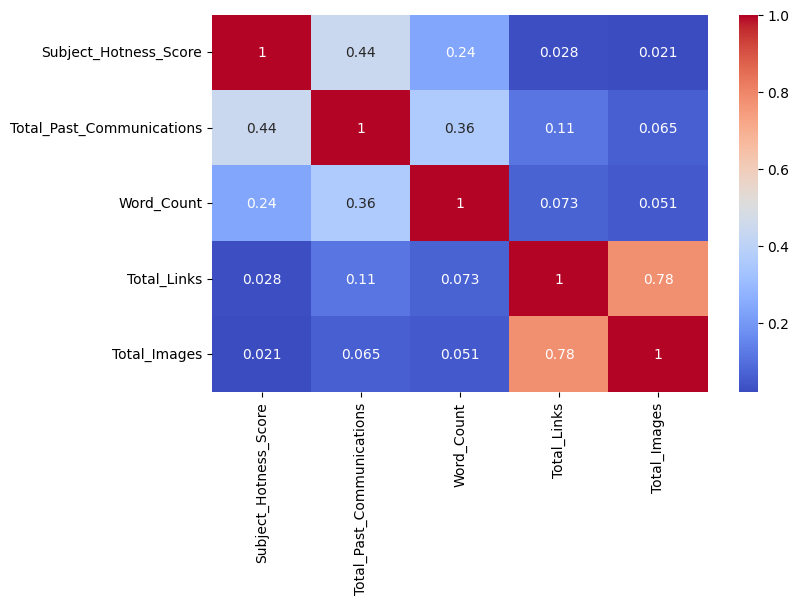

In [ ]:
## Correlation between continuous variables 
correlation = df[continuous_variables].corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')

Here it can observed that the correlation score is **0.78** for **Total_Images** and **Total_Links** which is on a scale of (-1,1) so it can be understood as a **high positive correlation**.

## **Data Cleaning**

### Handling Missing Data

In [ ]:
# Dropping Customer_Location column from the dataframe
df.drop(columns=['Customer_Location'], inplace = True)
# Removing Customer_Location from categorical_variables 
categorical_variables.remove('Customer_Location')

It's been already seen in our missing values analysis that the **Customer_Location** feature has the **most** number of missing values (16.963411 % missing values). Also, in categorical data analysis, after plotting the frequency graph of different values of Customer_location with respect to the **Email_status** category we found that the percentage ratio of Email being Ignored, Read or Acknowledged is the same **irrespective** of the **Customer_Location**.\
● The Customer_Location feature does not affect Email_Status and it can be dropped

In [ ]:
# Imputing Total_Past_Communications with the mean
df['Total_Past_Communications'].fillna(df['Total_Past_Communications'].mean(),inplace=True)

From the continuous data analysis part it's known get that the graph of **Total_past_Communications** follows **approximate Normal Distribution**. So, let's **impute** the missing values by the **mean** of the values.

In [ ]:
# Imputing Total_Links with the mode
df['Total_Links'].fillna(df['Total_Links'].mode()[0],inplace=True)

In [ ]:
# Imputing Total_Images with the mode
df['Total_Images'].fillna(df['Total_Images'].mode()[0],inplace=True)

From the continuous data analysis part it's known that the graph of **Total_Links & Total_Images** is **left skewed**. So, **imputing** the missing values by the **mode** of the values is most appropriate.

### Clean-up

In [ ]:
# Dropping column Email_ID  
df.drop(columns=['Email_ID'], inplace=True)

As it's known it is an ID column so it doesn't add value to our data and it's better to be dropped.

## **Feature Engineering**

### Multicollinearity

In [ ]:
# VIF code
def vif_cal(df):
  vif = pd.DataFrame()
  vif["variables"] = df.columns
  vif["VIF"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
  return(vif)

In [ ]:
# Let's get VIF scores
vif_df = vif_cal(df[[i for i in df.describe().columns if i not in categorical_variables + ['Email_Status']]])
vif_df

,variables,VIF
0,Subject_Hotness_Score,1.805701
1,Total_Past_Communications,3.939214
2,Word_Count,4.065844
3,Total_Links,8.690857
4,Total_Images,3.171439


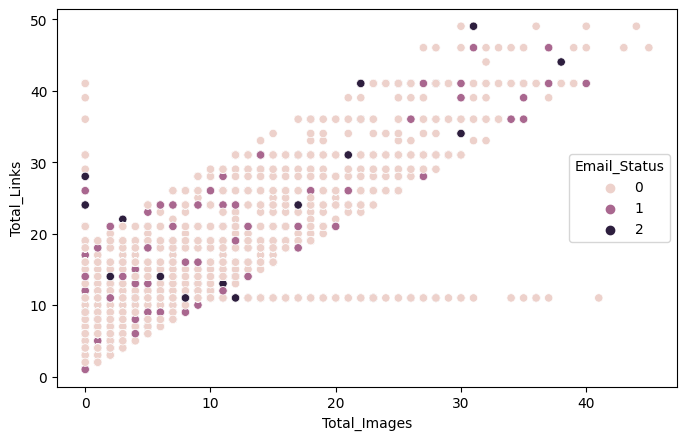

In [ ]:
#scatter plot between total images and total links
sns.scatterplot(x=df["Total_Images"],y=df["Total_Links"],hue=df['Email_Status'])

The ralation between Total Links and Total Images is almost linear so it would be better to add them together.

In [ ]:
# Combining total links and total images
df['Total_Images_Links'] = df['Total_Images'] + df['Total_Links']
# Dropping previous columns
df.drop(['Total_Images','Total_Links'],inplace=True,axis=1)

In [ ]:
# Let's check VIF scores
vif_df = vif_cal(df[[i for i in df.describe().columns if i not in categorical_variables + ['Email_Status']]])
vif_df

,variables,VIF
0,Subject_Hotness_Score,1.734531
1,Total_Past_Communications,3.430879
2,Word_Count,3.687067
3,Total_Images_Links,2.629047


### Outliers Treatment

In [ ]:
# Removing dropped columns from the dataset
continuous_variables.remove('Total_Images')
continuous_variables.remove('Total_Links')
# Adding the combined column
continuous_variables.append('Total_Images_Links')

In [ ]:
df.head()

,Email_Type,Subject_Hotness_Score,Email_Source_Type,Email_Campaign_Type,Total_Past_Communications,Time_Email_sent_Category,Word_Count,Email_Status,Total_Images_Links
0,1,2.2,2,2,33.0,1,440,0,8.0
1,2,2.1,1,2,15.0,2,504,0,5.0
2,2,0.1,1,3,36.0,2,962,1,5.0
3,1,3.0,2,2,25.0,2,610,0,16.0
4,1,0.0,2,3,18.0,2,947,0,4.0


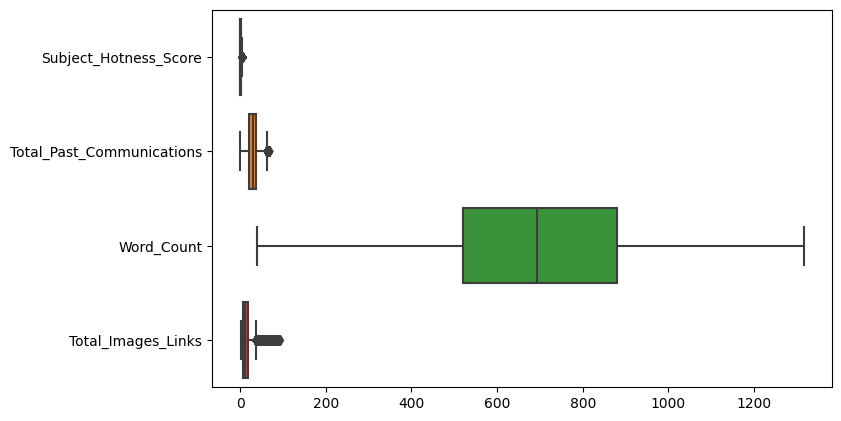

In [ ]:
# Check for the outliers in continuous variables
sns.boxplot(data = df[continuous_variables], orient='h', dodge=False)

The feature **Word_Count** has **no** outliers.

In [ ]:
# Removing Word_Count column as it has no outliers
continuous_variables.remove('Word_Count')
# Creating an empty dictionary to store the count of each Email_Status 
outliers = {}
for elem in continuous_variables:
  # Finding Quartile
  q_75, q_25 = np.percentile(df.loc[:,elem],[75,25])
  # Calculating Inter Quartile Range
  IQR = q_75-q_25
  # Fixing Boundaries for outliers
  max = q_75+(1.5*IQR)
  min = q_25-(1.5*IQR)
  # An empty list to store email_status of only outliers
  outlier_list=[]
  outlier_list=df.loc[df[elem] < min]['Email_Status'].tolist()
  outlier_list.append(df.loc[df[elem] > max]['Email_Status'].tolist()) 
  outliers[elem]={}
  for i in outlier_list[0]:
      outliers[elem][i] = outliers[elem].get(i,0) + 1
print(outliers)

{'Subject_Hotness_Score': {0: 170, 1: 76, 2: 1}, 'Total_Past_Communications': {1: 56, 0: 67, 2: 13}, 'Total_Images_Links': {0: 3061, 1: 437, 2: 122}}


Since the dependent variable is highly imbalanced so before dropping outliers it must be checked that it will not delete more than 5% of the minority class which is Email_Status =1,2.

In [ ]:
#finding the percentage of minority classs going to be affected by outliers
sum_min=0
sum_maj=0
for x in [y for y in continuous_variables]:
  sum_min += outliers[x][1]
  sum_min += outliers[x][2]
  sum_maj += outliers[x][0]
total=df.groupby('Email_Status').count()['Email_Type'][1]+df.groupby('Email_Status').count()['Email_Type'][2]
total_0=df.groupby('Email_Status').count()['Email_Type'][0]
print("Percentage of majority class having outliers = ",100*sum_maj/total_0)
print("Percentage of minority class having outliers = ",100*sum_min/total)

Percentage of majority class having outliers =  6.002803006861907
Percentage of minority class having outliers =  5.256486728303012


It can be understood that close to 5% of data was being removed from minority class. Hence decided against removing the outliers. This problem can be solved through normalization and choosing boosted trees for our modelling which are robust to outliers.

In [ ]:
# Deleting majority outliers
for elem in continuous_variables:
  q_low = df[elem].quantile(0.01)
  q_high  = df[elem].quantile(0.99)
  df = df.drop(df[(df[elem] > q_high) &  (df['Email_Status']==0)].index)
  df = df.drop(df[(df[elem] < q_low) & (df['Email_Status']==0)].index)

In [ ]:
categorical_variables

['Email_Type',
 'Email_Source_Type',
 'Email_Campaign_Type',
 'Time_Email_sent_Category']

In [ ]:
#creating dummy variables
df = pd.get_dummies(df,columns=categorical_variables, drop_first=True)
# as some features had binary categories, we are going to delete one of them to keep it binary encoded and have less columns
df.head(2)

,Subject_Hotness_Score,Total_Past_Communications,Word_Count,Email_Status,Total_Images_Links,Email_Type_2,Email_Source_Type_2,Email_Campaign_Type_2,Email_Campaign_Type_3,Time_Email_sent_Category_2,Time_Email_sent_Category_3
0,2.2,33.0,440,0,8.0,0,1,1,0,0,0
1,2.1,15.0,504,0,5.0,1,0,1,0,1,0


In [ ]:
df.shape

(66914, 11)

### Feature Scaling

In [ ]:
# Let's add word count back to the continuous variabl
continuous_variables.append('Word_Count')

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

# fit scaler to the train set, it will learn the parameters 
scaler.fit(df[continuous_variables])

# Transform train and test sets
df[continuous_variables] = scaler.transform(df[continuous_variables])

In [ ]:
# Splitting the data for training and testing
X_train, X_test, y_train, y_test = train_test_split(df.drop('Email_Status', axis = 1), df['Email_Status'], test_size=0.20, random_state = 42, stratify = df['Email_Status']) 

we need to stratify to get same proprtion of classes in both the sets.

In [ ]:
X_train.head()

,Subject_Hotness_Score,Total_Past_Communications,Word_Count,Total_Images_Links,Email_Type_2,Email_Source_Type_2,Email_Campaign_Type_2,Email_Campaign_Type_3,Time_Email_sent_Category_2,Time_Email_sent_Category_3
55992,0.02,0.671642,0.407524,0.170732,1,1,0,1,0,0
22065,0.56,0.447761,0.030564,0.060976,0,1,1,0,1,0
56936,0.26,0.402985,0.875392,0.475610,0,1,1,0,1,0
41297,0.14,0.507463,0.700627,0.085366,1,0,1,0,1,0
53205,0.44,0.537313,0.442790,0.060976,0,0,1,0,0,0


### Handling Imbalance 

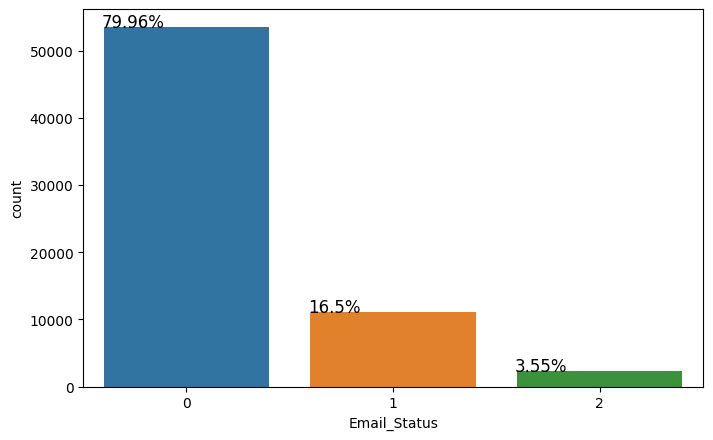

In [ ]:
# Visualizing our imbalanced dataset
ax = sns.countplot(x=df['Email_Status'])
totals = []
for i in ax.patches:
    totals.append(i.get_height())

total = sum(totals)

for i in ax.patches:
    ax.text(i.get_x() - .01, i.get_height() + .5, \
          str(round((i.get_height()/total)*100, 2))+'%', fontsize=12)
plt.show()

Only around 3.5% of observations are classified as acknowledged emails and 80% are ignored emails. This will create a bias in favour of ignored emails in the model.

#### Undersampling

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

rus = RandomUnderSampler(random_state=42, replacement=True)
x_train_rus, y_train_rus = rus.fit_resample(X_train, y_train)

print('Original dataset shape:', len(df))
print('Resampled dataset shape', len(y_train_rus))

Original dataset shape: 66914
Resampled dataset shape 5694


Text(0.5, 1.0, 'Before Undersampling')

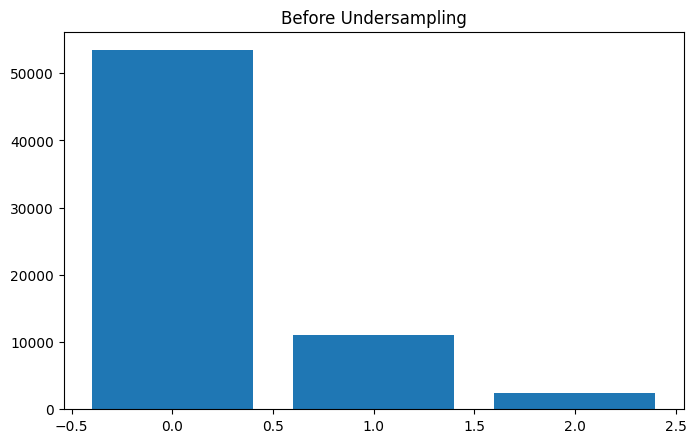

In [ ]:
plt.bar(Counter(df['Email_Status']).keys(), Counter(df['Email_Status']).values())
plt.title("Before Undersampling")

Text(0.5, 1.0, 'After Undersampling')

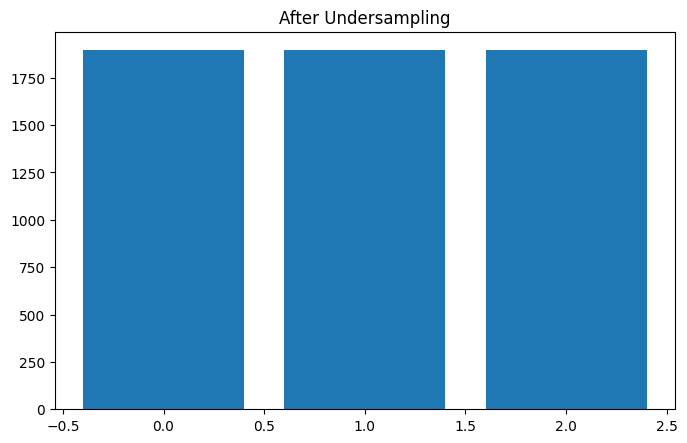

In [ ]:
plt.bar(Counter(y_train_rus).keys(), Counter(y_train_rus).values())
plt.title("After Undersampling")

In [ ]:
unique_elements, count_of_elements = np.unique(y_train_rus, return_counts=True)
print("Frequency of the unique values of Email_Status:")
print(np.asarray((unique_elements, count_of_elements)))

Frequency of the unique values of Email_Status:
[[   0    1    2]
 [1898 1898 1898]]


Random Under Sampler created a balanced dataset of 2373 records.

#### SMOTE (Synthetic Minority Oversampling Technique)

In [ ]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()

# Fit predictor and target variable
x_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
print('Original dataset shape', len(y_train))
print('Resampled dataset shape', len(y_train_smote))

Original dataset shape 53531
Resampled dataset shape 128406


Text(0.5, 1.0, 'After Undersampling')

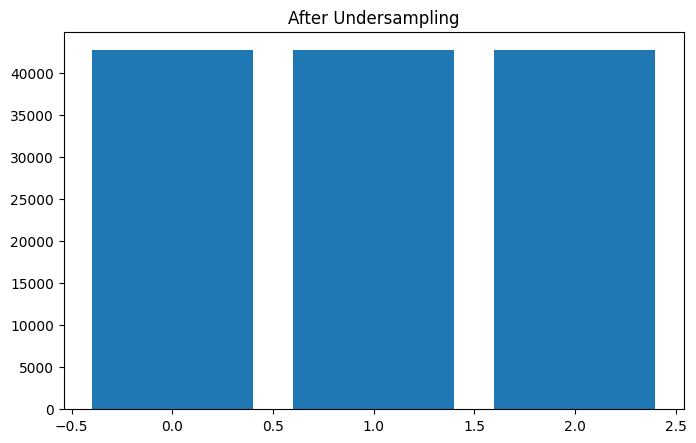

In [ ]:
plt.bar(Counter(y_train_smote).keys(), Counter(y_train_smote).values())
plt.title("After Undersampling")

## **Model Implementation and Evaluation**

In [ ]:
#Columns needed to compare metrics
comparison_columns = ['Model_Name', 'Train_Accuracy', 'Train_Recall', 'Train_Precision', 'Train_F1score', 'Train_AUC' ,'Test_Accuracy', 'Test_Recall', 'Test_Precision', 'Test_F1score', 'Test_AUC']

In [ ]:
def model_evaluation(model_name_RUS,model_name_SMOTE,model_var_rus, model_var_smote, x_train_rus, y_train_rus, x_train_smote, y_train_smote, X_test, y_test):
  ''' This function predicts, evaluates various models for clasification using Random Undersampling and SMOTE algorithms, visualizes results 
      and creates a dataframe that compares the various models.'''
  
  #Making predictions random undersampling
  y_pred_rus_train = model_var_rus.predict(x_train_rus)
  y_pred_rus_test = model_var_rus.predict(X_test)
  #probs
  train_rus_proba = model_var_rus.predict_proba(x_train_rus)
  test_rus_proba = model_var_rus.predict_proba(X_test)

  #Making predictions smote
  y_pred_smote_train = model_var_smote.predict(x_train_smote)
  y_pred_smote_test = model_var_smote.predict(X_test)
  #probs
  train_sm_proba = model_var_smote.predict_proba(x_train_smote)
  test_sm_proba = model_var_smote.predict_proba(X_test)

  #Evaluation 
  #Accuracy RUS
  accuracy_rus_train = accuracy_score(y_train_rus,y_pred_rus_train)
  accuracy_rus_test = accuracy_score(y_test,y_pred_rus_test)
  #Accuracy SMOTE
  accuracy_smote_train = accuracy_score(y_train_smote,y_pred_smote_train)
  accuracy_smote_test = accuracy_score(y_test,y_pred_smote_test)

  #Confusion Matrix RUS
  cm_rus_train = confusion_matrix(y_train_rus,y_pred_rus_train)
  cm_rus_test = confusion_matrix(y_test,y_pred_rus_test)
  #Confusion Matrix SMOTE
  cm_smote_train = confusion_matrix(y_train_smote,y_pred_smote_train)
  cm_smote_test = confusion_matrix(y_test,y_pred_smote_test)

  #Recall RUS
  train_recall_rus = recall_score(y_train_rus,y_pred_rus_train, average='weighted')
  test_recall_rus = recall_score(y_test,y_pred_rus_test, average='weighted')
  #Recall SMOTE
  train_recall_smote = recall_score(y_train_smote,y_pred_smote_train, average='weighted')
  test_recall_smote = recall_score(y_test,y_pred_smote_test, average='weighted')

  #Precision RUS
  train_precision_rus = precision_score(y_train_rus,y_pred_rus_train, average='weighted')
  test_precision_rus = precision_score(y_test,y_pred_rus_test, average='weighted')
  #Precision SMOTE
  train_precision_smote = precision_score(y_train_smote,y_pred_smote_train, average='weighted')
  test_precision_smote = precision_score(y_test,y_pred_smote_test, average='weighted')

  #F1 Score RUS
  train_f1_rus = f1_score(y_train_rus,y_pred_rus_train, average='weighted')
  test_f1_rus = f1_score(y_test,y_pred_rus_test, average='weighted')
  #F1 Score SMOTE
  train_f1_smote = f1_score(y_train_smote,y_pred_smote_train, average='weighted')
  test_f1_smote = f1_score(y_test,y_pred_smote_test, average='weighted')

  #ROC-AUC RUS
  train_auc_rus = roc_auc_score(y_train_rus,train_rus_proba,average='weighted',multi_class = 'ovr')
  test_auc_rus = roc_auc_score(y_test,test_rus_proba,average='weighted',multi_class = 'ovr')
  #ROC-AUC SMOTE
  train_auc_smote = roc_auc_score(y_train_smote,train_sm_proba,average='weighted',multi_class = 'ovr')
  test_auc_smote = roc_auc_score(y_test,test_sm_proba,average='weighted',multi_class = 'ovr')

  #Visualising Results RUS
  print("----- Evaluation on Random Undersampled data -----" + str(model_name_RUS) + "------")
  print("--------------Test data ---------------\n")
  print("Confusion matrix \n")
  print(cm_rus_test)
  print(classification_report(y_test,y_pred_rus_test))

  #create ROC curve
  fpr = {}
  tpr = {}
  thresh ={}
  no_of_class=3
  for i in range(no_of_class):    
      fpr[i], tpr[i], thresh[i] = metrics.roc_curve(y_test, test_rus_proba[:,i], pos_label=i)
  plt.plot(fpr[0], tpr[0], linestyle='--',color='blue', label='Class 0 vs Others'+"AUC="+str(test_auc_rus))
  plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Others'+"AUC="+str(test_auc_rus))
  plt.plot(fpr[2], tpr[2], linestyle='--',color='orange', label='Class 2 vs Others'+"AUC="+str(test_auc_rus))
  plt.title('Multiclass ROC curve of ' + str(model_name_RUS))
  plt.ylabel('True Positive Rate')
  plt.xlabel('False Positive Rate')
  plt.legend(loc=4)
  plt.show()

  #Visualising Results SMOTE
  print("----- Evaluation on SMOTE data -------" + str(model_name_SMOTE) + '-----')
  print("---------------Test data ---------------\n")
  print("Confusion matrix \n")
  print(cm_smote_test)
  print(classification_report(y_test,y_pred_smote_test))

  #create ROC curve
  fpr = {}
  tpr = {}
  thresh ={}
  no_of_class=3
  for i in range(no_of_class):    
      fpr[i], tpr[i], thresh[i] = metrics.roc_curve(y_test, test_sm_proba[:,i], pos_label=i)
  plt.plot(fpr[0], tpr[0], linestyle='--',color='blue', label='Class 0 vs Others'+" AUC="+str(test_auc_smote))
  plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Others'+" AUC="+str(test_auc_smote))
  plt.plot(fpr[2], tpr[2], linestyle='--',color='orange', label='Class 2 vs Others'+" AUC="+str(test_auc_smote))
  plt.title('Multiclass ROC curve of '+ str(model_name_SMOTE))
  plt.ylabel('True Positive Rate')
  plt.xlabel('False Positive Rate')
  plt.legend(loc=4)
  plt.show()

  #Saving our results
  global comparison_columns
  metric_scores_rus = [model_name_RUS,accuracy_rus_train,train_recall_rus,train_precision_rus,train_f1_rus,train_auc_rus,accuracy_rus_test,test_recall_rus,test_precision_rus,test_f1_rus,test_auc_rus]
  final_dict_rus = dict(zip(comparison_columns,metric_scores_rus))

  metric_scores_smote = [model_name_SMOTE,accuracy_smote_train,train_recall_smote,train_precision_smote,train_f1_smote,train_auc_smote,accuracy_smote_test,test_recall_smote,test_precision_smote,test_f1_smote,test_auc_smote]
  final_dict_smote = dict(zip(comparison_columns,metric_scores_smote))

  dict_list = [final_dict_rus, final_dict_smote]
  return dict_list

In [ ]:
# Function to create the comparison table
final_list = []
def add_list_to_final_df(dict_list):
  global final_list
  for elem in dict_list:
    final_list.append(elem)
  global comparison_df
  comparison_df = pd.DataFrame(final_list, columns= comparison_columns)

### Logistic Regression

In [ ]:
# Importing library
from sklearn.linear_model import LogisticRegression
# Fitting Random Under Sampling
logistic_rus = LogisticRegression(class_weight='balanced',multi_class='multinomial', solver='lbfgs')
logistic_rus.fit(x_train_rus, y_train_rus)

LogisticRegression(class_weight='balanced', multi_class='multinomial')

In [ ]:
# Fitting on smote
logistic_smote = LogisticRegression(class_weight='balanced',multi_class='multinomial', solver='lbfgs')
logistic_smote.fit(x_train_smote, y_train_smote)

LogisticRegression(class_weight='balanced', multi_class='multinomial')

----- Evaluation on Random Undersampled data -----Logistic Regression RUS------
--------------Test data ---------------

Confusion matrix 

[[7618 1385 1697]
 [ 696  462 1050]
 [ 101   53  321]]
              precision    recall  f1-score   support

           0       0.91      0.71      0.80     10700
           1       0.24      0.21      0.22      2208
           2       0.10      0.68      0.18       475

    accuracy                           0.63     13383
   macro avg       0.42      0.53      0.40     13383
weighted avg       0.77      0.63      0.68     13383



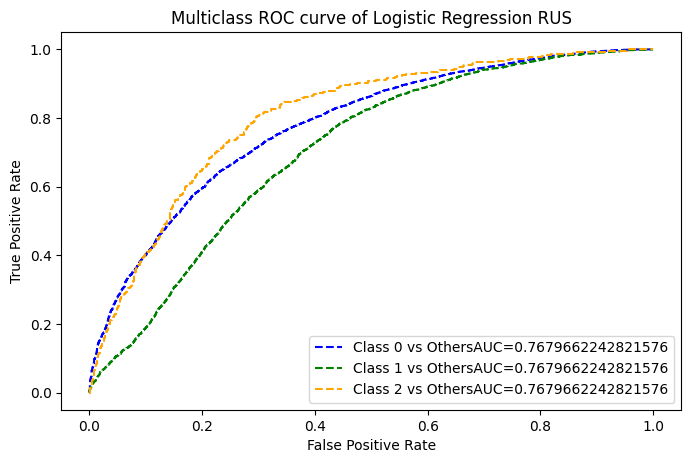

----- Evaluation on SMOTE data -------Logistic Regression SMOTE-----
---------------Test data ---------------

Confusion matrix 

[[7615 1455 1630]
 [ 698  483 1027]
 [ 102   61  312]]
              precision    recall  f1-score   support

           0       0.90      0.71      0.80     10700
           1       0.24      0.22      0.23      2208
           2       0.11      0.66      0.18       475

    accuracy                           0.63     13383
   macro avg       0.42      0.53      0.40     13383
weighted avg       0.77      0.63      0.68     13383



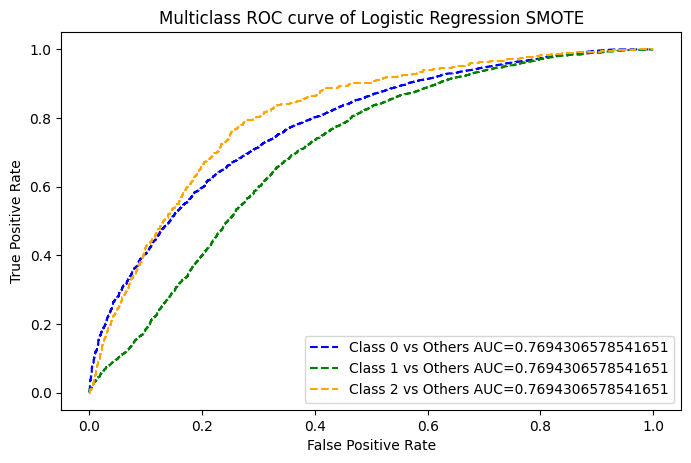

[{'Model_Name': 'Logistic Regression RUS',
  'Train_Accuracy': 0.5337197049525817,
  'Train_Recall': 0.5337197049525817,
  'Train_Precision': 0.5176787576384956,
  'Train_F1score': 0.5063646971139278,
  'Train_AUC': 0.7242844870628984,
  'Test_Accuracy': 0.6277366808637824,
  'Test_Recall': 0.6277366808637824,
  'Test_Precision': 0.7676286792280085,
  'Test_F1score': 0.6808161675420973,
  'Test_AUC': 0.7679662242821576},
 {'Model_Name': 'Logistic Regression SMOTE',
  'Train_Accuracy': 0.5333317757737177,
  'Train_Recall': 0.5333317757737177,
  'Train_Precision': 0.516798654424791,
  'Train_F1score': 0.5085669528728615,
  'Train_AUC': 0.7215695914488522,
  'Test_Accuracy': 0.6284091758200703,
  'Test_Recall': 0.6284091758200703,
  'Test_Precision': 0.7671062849182539,
  'Test_F1score': 0.6813384142273048,
  'Test_AUC': 0.7694306578541651}]

In [ ]:
# Let's evaluate logistic regression
logistic_reg_list = model_evaluation('Logistic Regression RUS','Logistic Regression SMOTE',logistic_rus, logistic_smote, x_train_rus, y_train_rus, x_train_smote, y_train_smote, X_test, y_test)
logistic_reg_list

In [ ]:
# Adding results to final list
add_list_to_final_df(logistic_reg_list)

In [ ]:
# Having a look at our final comparison dataframe
comparison_df

,Model_Name,Train_Accuracy,Train_Recall,Train_Precision,Train_F1score,Train_AUC,Test_Accuracy,Test_Recall,Test_Precision,Test_F1score,Test_AUC
0,Logistic Regression RUS,0.533720,0.533720,0.517679,0.506365,0.724284,0.627737,0.627737,0.767629,0.680816,0.767966
1,Logistic Regression SMOTE,0.533332,0.533332,0.516799,0.508567,0.721570,0.628409,0.628409,0.767106,0.681338,0.769431


### Decision Tree

In [ ]:
# Importing library
from sklearn.tree import DecisionTreeClassifier

In [ ]:
# Applying Classifier using Random under sampling
dt_rus = DecisionTreeClassifier()
dt_rus.fit(x_train_rus,y_train_rus)

DecisionTreeClassifier()

In [ ]:
# Applying Classifier using SMOTE
dt_smote = DecisionTreeClassifier()
dt_smote.fit(x_train_smote,y_train_smote)

DecisionTreeClassifier()

----- Evaluation on Random Undersampled data -----Decision Tree RUS------
--------------Test data ---------------

Confusion matrix 

[[5588 2910 2202]
 [ 610  792  806]
 [  81  175  219]]
              precision    recall  f1-score   support

           0       0.89      0.52      0.66     10700
           1       0.20      0.36      0.26      2208
           2       0.07      0.46      0.12       475

    accuracy                           0.49     13383
   macro avg       0.39      0.45      0.35     13383
weighted avg       0.75      0.49      0.57     13383



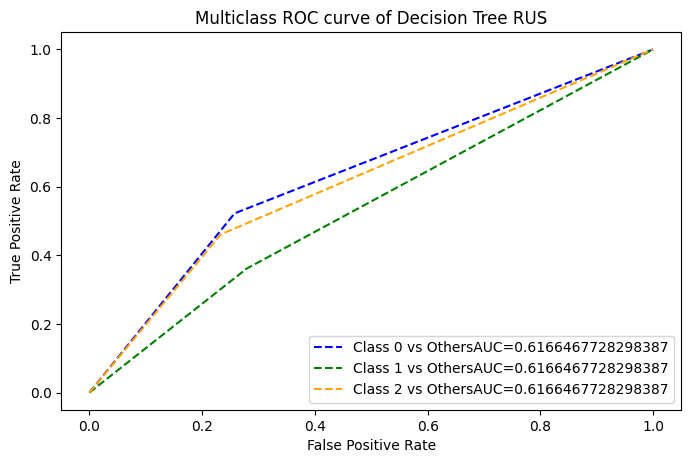

----- Evaluation on SMOTE data -------Decision Tree SMOTE-----
---------------Test data ---------------

Confusion matrix 

[[8537 1716  447]
 [1274  672  262]
 [ 234  163   78]]
              precision    recall  f1-score   support

           0       0.85      0.80      0.82     10700
           1       0.26      0.30      0.28      2208
           2       0.10      0.16      0.12       475

    accuracy                           0.69     13383
   macro avg       0.40      0.42      0.41     13383
weighted avg       0.73      0.69      0.71     13383



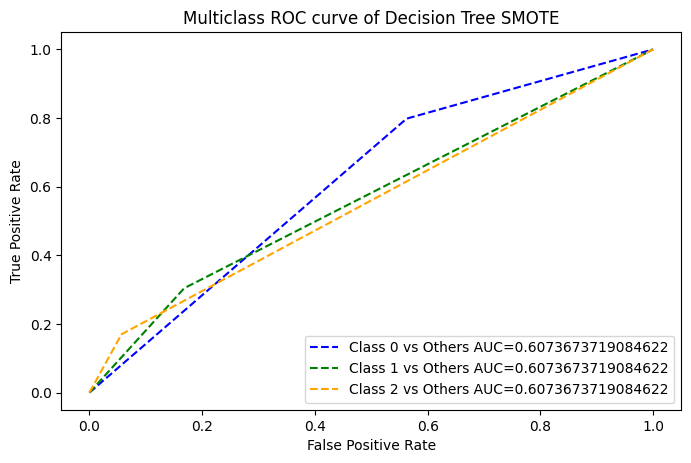

[{'Model_Name': 'Decision Tree RUS',
  'Train_Accuracy': 0.9992975061468212,
  'Train_Recall': 0.9992975061468212,
  'Train_Precision': 0.9992989835261129,
  'Train_F1score': 0.9992975053667925,
  'Train_AUC': 0.9999992597535794,
  'Test_Accuracy': 0.49308824628259734,
  'Test_Recall': 0.4930882462825974,
  'Test_Precision': 0.7476471240808137,
  'Test_F1score': 0.5734121535568291,
  'Test_AUC': 0.6166467728298387},
 {'Model_Name': 'Decision Tree SMOTE',
  'Train_Accuracy': 0.9994081273460742,
  'Train_Recall': 0.9994081273460742,
  'Train_Precision': 0.9994086700781992,
  'Train_F1score': 0.9994081614919633,
  'Train_AUC': 0.9999996201806344,
  'Test_Accuracy': 0.6939400732272286,
  'Test_Recall': 0.6939400732272286,
  'Test_Precision': 0.7264732008126414,
  'Test_F1score': 0.7090210546541689,
  'Test_AUC': 0.6073673719084622}]

In [ ]:
# Evaluating Dcision Tree Classifier
dt_eval_list = model_evaluation('Decision Tree RUS', 'Decision Tree SMOTE', dt_rus, dt_smote, x_train_rus, y_train_rus, x_train_smote, y_train_smote, X_test, y_test)
dt_eval_list

In [ ]:
# Updating the results list
add_list_to_final_df(dt_eval_list)
# Having a look at our final comparison dataframe
comparison_df

,Model_Name,Train_Accuracy,Train_Recall,Train_Precision,Train_F1score,Train_AUC,Test_Accuracy,Test_Recall,Test_Precision,Test_F1score,Test_AUC
0,Logistic Regression RUS,0.533720,0.533720,0.517679,0.506365,0.724284,0.627737,0.627737,0.767629,0.680816,0.767966
1,Logistic Regression SMOTE,0.533332,0.533332,0.516799,0.508567,0.721570,0.628409,0.628409,0.767106,0.681338,0.769431
2,Decision Tree RUS,0.999298,0.999298,0.999299,0.999298,0.999999,0.493088,0.493088,0.747647,0.573412,0.616647
3,Decision Tree SMOTE,0.999408,0.999408,0.999409,0.999408,1.000000,0.693940,0.693940,0.726473,0.709021,0.607367


### KNN

In [ ]:
# Importing library
from sklearn.neighbors import KNeighborsClassifier
knn_rus = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)

# Fit the model on the train set
knn_rus.fit(x_train_rus,y_train_rus)

KNeighborsClassifier()

In [ ]:
# Applying Classifier SMOTE
knn_smote = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)

# Fit the model on the train set
knn_smote.fit(x_train_smote,y_train_smote)

KNeighborsClassifier()

----- Evaluation on Random Undersampled data -----KNN RUS------
--------------Test data ---------------

Confusion matrix 

[[6978 2390 1332]
 [ 733  763  712]
 [ 121  150  204]]
              precision    recall  f1-score   support

           0       0.89      0.65      0.75     10700
           1       0.23      0.35      0.28      2208
           2       0.09      0.43      0.15       475

    accuracy                           0.59     13383
   macro avg       0.40      0.48      0.39     13383
weighted avg       0.75      0.59      0.65     13383



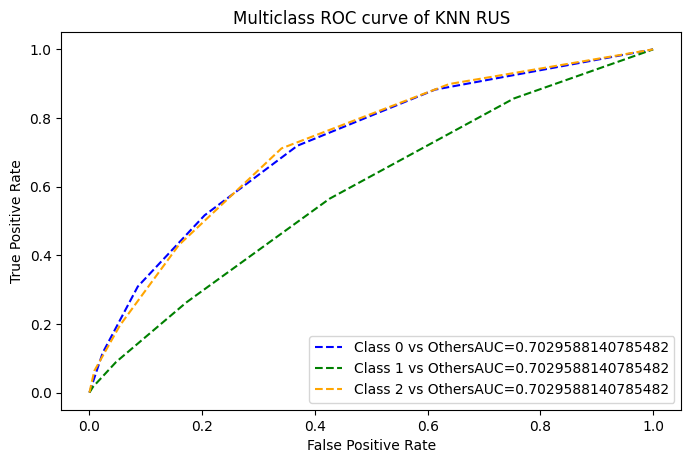

----- Evaluation on SMOTE data -------KNN SMOTE-----
---------------Test data ---------------

Confusion matrix 

[[6961 2648 1091]
 [ 785  926  497]
 [ 133  212  130]]
              precision    recall  f1-score   support

           0       0.88      0.65      0.75     10700
           1       0.24      0.42      0.31      2208
           2       0.08      0.27      0.12       475

    accuracy                           0.60     13383
   macro avg       0.40      0.45      0.39     13383
weighted avg       0.75      0.60      0.65     13383



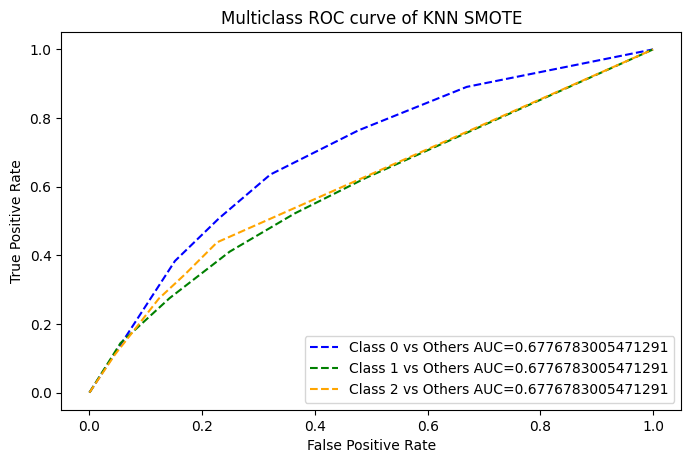

[{'Model_Name': 'KNN RUS',
  'Train_Accuracy': 0.660695468914647,
  'Train_Recall': 0.660695468914647,
  'Train_Precision': 0.6616649225222823,
  'Train_F1score': 0.657476524539513,
  'Train_AUC': 0.8475643163102564,
  'Test_Accuracy': 0.5936636030785325,
  'Test_Recall': 0.5936636030785325,
  'Test_Precision': 0.753674916708658,
  'Test_F1score': 0.6531031148286202,
  'Test_AUC': 0.7029588140785482},
 {'Model_Name': 'KNN SMOTE',
  'Train_Accuracy': 0.8824587636091772,
  'Train_Recall': 0.8824587636091772,
  'Train_Precision': 0.8908500008139171,
  'Train_F1score': 0.8799474085196262,
  'Train_AUC': 0.9835376614050446,
  'Test_Accuracy': 0.5990435627288351,
  'Test_Recall': 0.5990435627288351,
  'Test_Precision': 0.7494064320437409,
  'Test_F1score': 0.6542986445005657,
  'Test_AUC': 0.6776783005471291}]

In [ ]:
# KNN Evaluation
knn_eval_list = model_evaluation('KNN RUS', 'KNN SMOTE', knn_rus, knn_smote, x_train_rus, y_train_rus, x_train_smote, y_train_smote, X_test, y_test)
knn_eval_list

In [ ]:
# Updating the results list
add_list_to_final_df(knn_eval_list)
# Having a look at our final comparison dataframe
comparison_df

,Model_Name,Train_Accuracy,Train_Recall,Train_Precision,Train_F1score,Train_AUC,Test_Accuracy,Test_Recall,Test_Precision,Test_F1score,Test_AUC
0,Logistic Regression RUS,0.533720,0.533720,0.517679,0.506365,0.724284,0.627737,0.627737,0.767629,0.680816,0.767966
1,Logistic Regression SMOTE,0.533332,0.533332,0.516799,0.508567,0.721570,0.628409,0.628409,0.767106,0.681338,0.769431
2,Decision Tree RUS,0.999298,0.999298,0.999299,0.999298,0.999999,0.493088,0.493088,0.747647,0.573412,0.616647
3,Decision Tree SMOTE,0.999408,0.999408,0.999409,0.999408,1.000000,0.693940,0.693940,0.726473,0.709021,0.607367
4,KNN RUS,0.660695,0.660695,0.661665,0.657477,0.847564,0.593664,0.593664,0.753675,0.653103,0.702959
5,KNN SMOTE,0.882459,0.882459,0.890850,0.879947,0.983538,0.599044,0.599044,0.749406,0.654299,0.677678


### Random Forest

In [ ]:
# Importing library
from sklearn.ensemble import RandomForestClassifier

# Applying Classifier using Random under sampling
rf_rus = RandomForestClassifier(random_state=42, max_depth=5, n_estimators=100, oob_score=True)
rf_rus.fit(x_train_rus,y_train_rus)

RandomForestClassifier(max_depth=5, oob_score=True, random_state=42)

In [ ]:
# Applying Classifier SMOTE
rf_smote = RandomForestClassifier(random_state=42, max_depth=5, n_estimators=100, oob_score=True)
rf_smote.fit(x_train_smote,y_train_smote)

RandomForestClassifier(max_depth=5, oob_score=True, random_state=42)

----- Evaluation on Random Undersampled data -----Random Forest RUS------
--------------Test data ---------------

Confusion matrix 

[[7864 1174 1662]
 [ 707  460 1041]
 [  88   48  339]]
              precision    recall  f1-score   support

           0       0.91      0.73      0.81     10700
           1       0.27      0.21      0.24      2208
           2       0.11      0.71      0.19       475

    accuracy                           0.65     13383
   macro avg       0.43      0.55      0.41     13383
weighted avg       0.78      0.65      0.70     13383



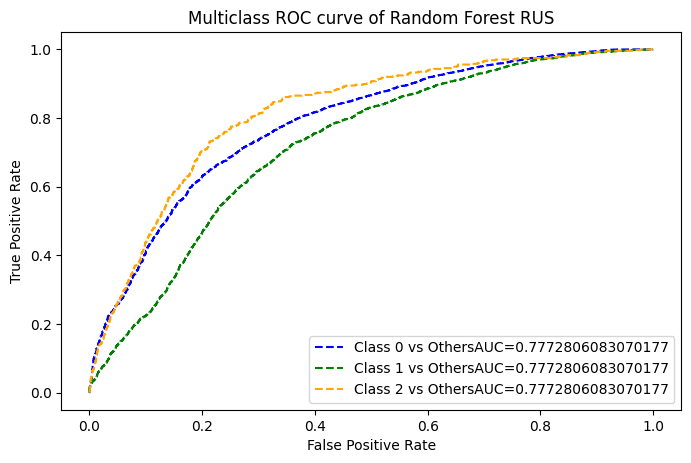

----- Evaluation on SMOTE data -------Random Forest SMOTE-----
---------------Test data ---------------

Confusion matrix 

[[8272 1138 1290]
 [ 824  496  888]
 [ 112   60  303]]
              precision    recall  f1-score   support

           0       0.90      0.77      0.83     10700
           1       0.29      0.22      0.25      2208
           2       0.12      0.64      0.21       475

    accuracy                           0.68     13383
   macro avg       0.44      0.55      0.43     13383
weighted avg       0.77      0.68      0.71     13383



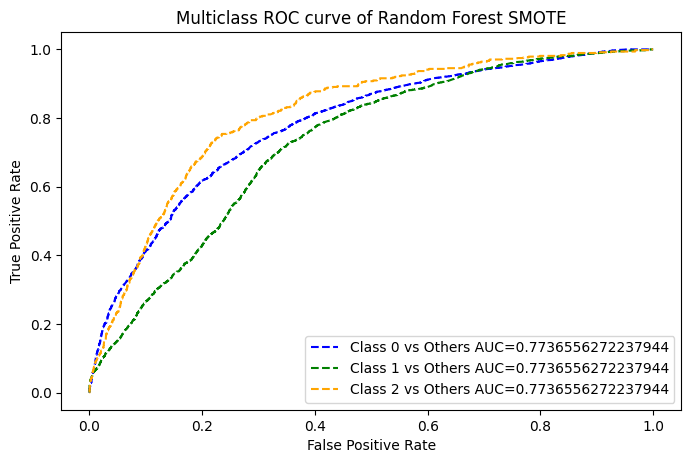

[{'Model_Name': 'Random Forest RUS',
  'Train_Accuracy': 0.5570776255707762,
  'Train_Recall': 0.5570776255707762,
  'Train_Precision': 0.5482659301681582,
  'Train_F1score': 0.5317366793930819,
  'Train_AUC': 0.7545140689384089,
  'Test_Accuracy': 0.6473137562579392,
  'Test_Recall': 0.6473137562579392,
  'Test_Precision': 0.7751922748999633,
  'Test_F1score': 0.6954243207910956,
  'Test_AUC': 0.7772806083070177},
 {'Model_Name': 'Random Forest SMOTE',
  'Train_Accuracy': 0.5595922308926374,
  'Train_Recall': 0.5595922308926374,
  'Train_Precision': 0.5421963218738554,
  'Train_F1score': 0.5337695436472658,
  'Train_AUC': 0.7570657437238394,
  'Test_Accuracy': 0.6778001942763207,
  'Test_Recall': 0.6778001942763207,
  'Test_Precision': 0.7708918934415131,
  'Test_F1score': 0.7136410297914826,
  'Test_AUC': 0.7736556272237944}]

In [ ]:
# Random Forest Evaluation
rf_eval_list = model_evaluation('Random Forest RUS', 'Random Forest SMOTE', rf_rus, rf_smote, x_train_rus, y_train_rus, x_train_smote, y_train_smote, X_test, y_test)
rf_eval_list

In [ ]:
# Updating the results list
add_list_to_final_df(rf_eval_list)
# Having a look at our final comparison dataframe
comparison_df

,Model_Name,Train_Accuracy,Train_Recall,Train_Precision,Train_F1score,Train_AUC,Test_Accuracy,Test_Recall,Test_Precision,Test_F1score,Test_AUC
0,Logistic Regression RUS,0.533720,0.533720,0.517679,0.506365,0.724284,0.627737,0.627737,0.767629,0.680816,0.767966
1,Logistic Regression SMOTE,0.533332,0.533332,0.516799,0.508567,0.721570,0.628409,0.628409,0.767106,0.681338,0.769431
2,Decision Tree RUS,0.999298,0.999298,0.999299,0.999298,0.999999,0.493088,0.493088,0.747647,0.573412,0.616647
3,Decision Tree SMOTE,0.999408,0.999408,0.999409,0.999408,1.000000,0.693940,0.693940,0.726473,0.709021,0.607367
4,KNN RUS,0.660695,0.660695,0.661665,0.657477,0.847564,0.593664,0.593664,0.753675,0.653103,0.702959
5,KNN SMOTE,0.882459,0.882459,0.890850,0.879947,0.983538,0.599044,0.599044,0.749406,0.654299,0.677678
6,Random Forest RUS,0.557078,0.557078,0.548266,0.531737,0.754514,0.647314,0.647314,0.775192,0.695424,0.777281
7,Random Forest SMOTE,0.559592,0.559592,0.542196,0.533770,0.757066,0.677800,0.677800,0.770892,0.713641,0.773656


### Random Forest Hyperparameter Tuning

In [ ]:
# Fitting the classifier
rf = RandomForestClassifier(random_state=42, n_jobs=-1)

# Parameter dictionary
params = {'max_depth': [3,5,10,20],
          'min_samples_leaf': [5,10,20,50,100],
          'n_estimators': [10,25,30,50,100,200]}

# Grid Search to get the best parameters
grid_search = GridSearchCV(estimator=rf, param_grid=params, cv = 4, n_jobs=-1, verbose=1, scoring="f1_weighted")

# Fitting Random Under Sampling to grid search
grid_search.fit(x_train_rus,y_train_rus)

Fitting 4 folds for each of 120 candidates, totalling 480 fits


GridSearchCV(cv=4, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100],
                         'n_estimators': [10, 25, 30, 50, 100, 200]},
             scoring='f1_weighted', verbose=1)

In [ ]:
# Best parameters 
rf_tuned_rus = grid_search.best_estimator_

In [ ]:
# Fitting SMOTE to grid search
grid_search_smote = GridSearchCV(estimator=rf, param_grid=params, cv = 4, n_jobs=-1, verbose=1, scoring="f1_weighted")
grid_search_smote.fit(x_train_smote,y_train_smote)

# Best smote Parameters 
rf_tuned_smote = grid_search_smote.best_estimator_

Fitting 4 folds for each of 120 candidates, totalling 480 fits


----- Evaluation on Random Undersampled data -----Random Forest Tuned RUS------
--------------Test data ---------------

Confusion matrix 

[[7316 1848 1536]
 [ 607  699  902]
 [  76   96  303]]
              precision    recall  f1-score   support

           0       0.91      0.68      0.78     10700
           1       0.26      0.32      0.29      2208
           2       0.11      0.64      0.19       475

    accuracy                           0.62     13383
   macro avg       0.43      0.55      0.42     13383
weighted avg       0.78      0.62      0.68     13383



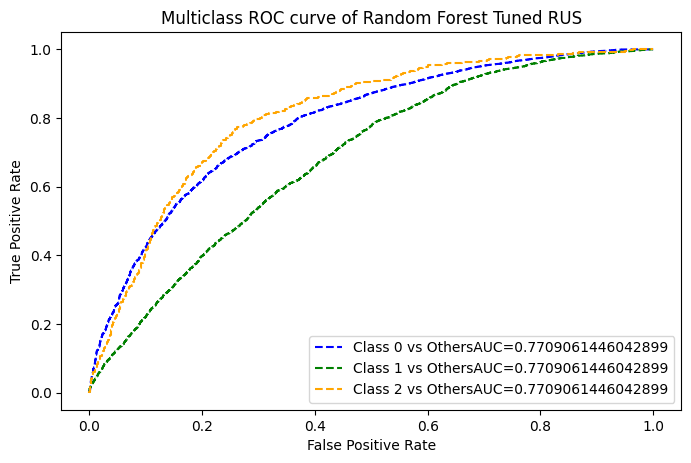

----- Evaluation on SMOTE data -------Random Forest Tuned SMOTE-----
---------------Test data ---------------

Confusion matrix 

[[9166 1172  362]
 [1141  778  289]
 [ 190  198   87]]
              precision    recall  f1-score   support

           0       0.87      0.86      0.86     10700
           1       0.36      0.35      0.36      2208
           2       0.12      0.18      0.14       475

    accuracy                           0.75     13383
   macro avg       0.45      0.46      0.46     13383
weighted avg       0.76      0.75      0.76     13383



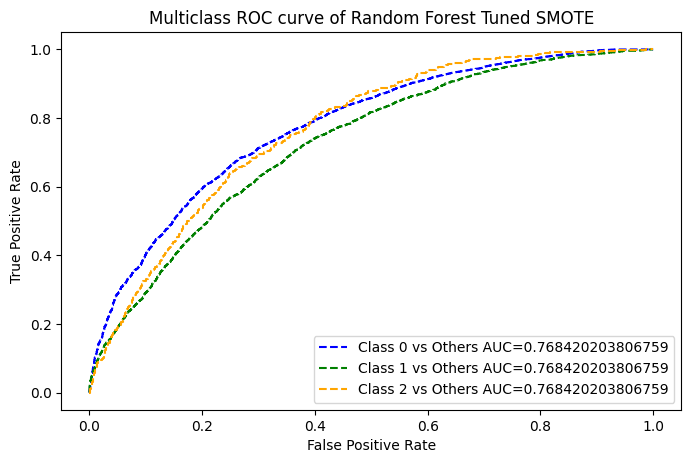

[{'Model_Name': 'Random Forest Tuned RUS',
  'Train_Accuracy': 0.7669476642079381,
  'Train_Recall': 0.7669476642079381,
  'Train_Precision': 0.7696046763906457,
  'Train_F1score': 0.7662913859655321,
  'Train_AUC': 0.9241413511643891,
  'Test_Accuracy': 0.6215347829335724,
  'Test_Recall': 0.6215347829335724,
  'Test_Precision': 0.7788116343416165,
  'Test_F1score': 0.6798620117857045,
  'Test_AUC': 0.7709061446042899},
 {'Model_Name': 'Random Forest Tuned SMOTE',
  'Train_Accuracy': 0.9111879507188138,
  'Train_Recall': 0.9111879507188138,
  'Train_Precision': 0.9112465837448465,
  'Train_F1score': 0.9106394586561384,
  'Train_AUC': 0.9847631659644223,
  'Test_Accuracy': 0.749532989613689,
  'Test_Recall': 0.749532989613689,
  'Test_Precision': 0.7620853140234926,
  'Test_F1score': 0.7554833968227526,
  'Test_AUC': 0.768420203806759}]

In [ ]:
# Evaluation for Random Forest Hyperparameter Tuned model
rf_tuned_list = model_evaluation('Random Forest Tuned RUS', 'Random Forest Tuned SMOTE', rf_tuned_rus, rf_tuned_smote,x_train_rus, y_train_rus, x_train_smote, y_train_smote, X_test, y_test)
rf_tuned_list

In [ ]:
# Updating the results list
add_list_to_final_df(rf_tuned_list)
# Having a look at our final comparison dataframe
comparison_df

,Model_Name,Train_Accuracy,Train_Recall,Train_Precision,Train_F1score,Train_AUC,Test_Accuracy,Test_Recall,Test_Precision,Test_F1score,Test_AUC
0,Logistic Regression RUS,0.533720,0.533720,0.517679,0.506365,0.724284,0.627737,0.627737,0.767629,0.680816,0.767966
1,Logistic Regression SMOTE,0.533332,0.533332,0.516799,0.508567,0.721570,0.628409,0.628409,0.767106,0.681338,0.769431
2,Decision Tree RUS,0.999298,0.999298,0.999299,0.999298,0.999999,0.493088,0.493088,0.747647,0.573412,0.616647
3,Decision Tree SMOTE,0.999408,0.999408,0.999409,0.999408,1.000000,0.693940,0.693940,0.726473,0.709021,0.607367
4,KNN RUS,0.660695,0.660695,0.661665,0.657477,0.847564,0.593664,0.593664,0.753675,0.653103,0.702959
5,KNN SMOTE,0.882459,0.882459,0.890850,0.879947,0.983538,0.599044,0.599044,0.749406,0.654299,0.677678
6,Random Forest RUS,0.557078,0.557078,0.548266,0.531737,0.754514,0.647314,0.647314,0.775192,0.695424,0.777281
7,Random Forest SMOTE,0.559592,0.559592,0.542196,0.533770,0.757066,0.677800,0.677800,0.770892,0.713641,0.773656
8,Random Forest Tuned RUS,0.766948,0.766948,0.769605,0.766291,0.924141,0.621535,0.621535,0.778812,0.679862,0.770906
9,Random Forest Tuned SMOTE,0.911188,0.911188,0.911247,0.910639,0.984763,0.749533,0.749533,0.762085,0.755483,0.768420


In [ ]:
# Feature importance given by hyperparameter random forest tuned model
feature_imp = pd.DataFrame({"Variable": x_train_smote.columns,"Importance": rf_tuned_smote.feature_importances_})
feature_imp.sort_values(by="Importance", ascending=False, inplace = True)

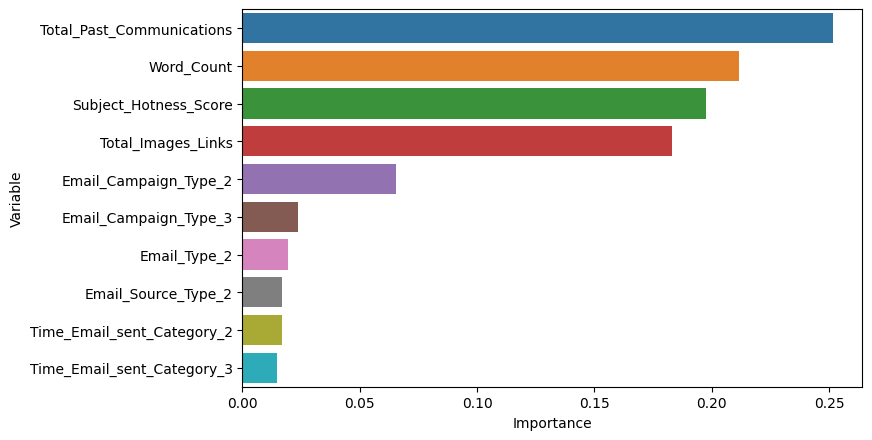

In [ ]:
# Visualizing feature importance 
sns.barplot(x=feature_imp['Importance'],y= feature_imp['Variable'])

In [ ]:
# Dropping irrelevant features
x_train_smote1 = x_train_smote.drop(['Time_Email_sent_Category_3','Time_Email_sent_Category_2','Email_Campaign_Type_3'],axis=1)
x_train_rus1 = x_train_rus.drop(['Time_Email_sent_Category_3','Time_Email_sent_Category_2','Email_Campaign_Type_3'],axis=1)
X_test1 = X_test.drop(['Time_Email_sent_Category_3','Time_Email_sent_Category_2','Email_Campaign_Type_3'],axis=1)

In [ ]:
# Grid Search to get the best parameters for RUS
grid_search_rus = GridSearchCV(estimator=rf, param_grid=params, cv = 4, n_jobs=-1, verbose=1, scoring="f1_weighted")
# Fitting RUS to grid search
grid_search_rus.fit(x_train_rus1,y_train_rus)
# Optimal model
rf_tuned_rus1 = grid_search_rus.best_estimator_

Fitting 4 folds for each of 120 candidates, totalling 480 fits


In [ ]:
# Fitting SMOTE
grid_search_smote1 = GridSearchCV(estimator=rf, param_grid=params, cv = 4, n_jobs=-1, verbose=1, scoring="f1_weighted")
grid_search_smote1.fit(x_train_smote1,y_train_smote)
# Optimal smote model
rf_tuned_smote1 = grid_search_smote1.best_estimator_

Fitting 4 folds for each of 120 candidates, totalling 480 fits


----- Evaluation on Random Undersampled data -----Random Forest Tuned RUS FSelect------
--------------Test data ---------------

Confusion matrix 

[[7285 1856 1559]
 [ 596  680  932]
 [  81   97  297]]
              precision    recall  f1-score   support

           0       0.91      0.68      0.78     10700
           1       0.26      0.31      0.28      2208
           2       0.11      0.63      0.18       475

    accuracy                           0.62     13383
   macro avg       0.43      0.54      0.41     13383
weighted avg       0.78      0.62      0.68     13383



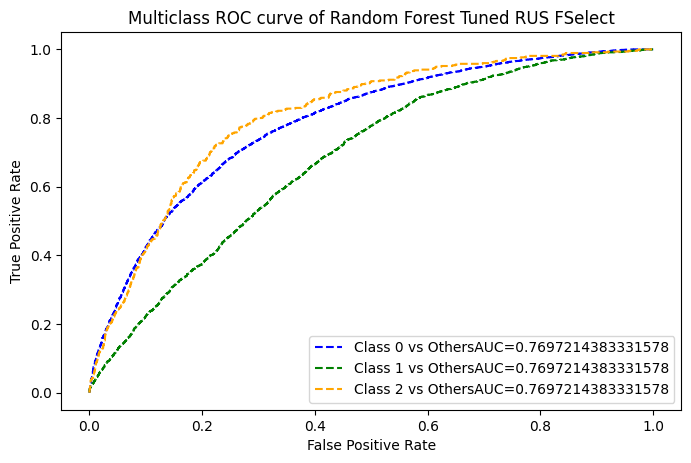

----- Evaluation on SMOTE data -------Random Forest Tuned SMOTE FSelect-----
---------------Test data ---------------

Confusion matrix 

[[9250 1086  364]
 [1158  759  291]
 [ 205  186   84]]
              precision    recall  f1-score   support

           0       0.87      0.86      0.87     10700
           1       0.37      0.34      0.36      2208
           2       0.11      0.18      0.14       475

    accuracy                           0.75     13383
   macro avg       0.45      0.46      0.45     13383
weighted avg       0.76      0.75      0.76     13383



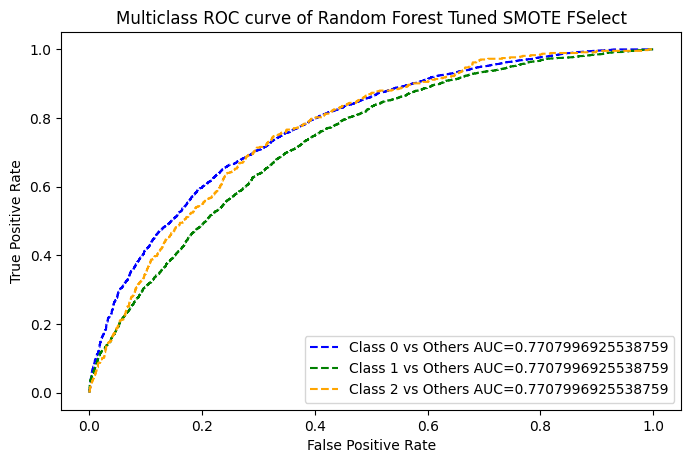

[{'Model_Name': 'Random Forest Tuned RUS FSelect',
  'Train_Accuracy': 0.7602739726027398,
  'Train_Recall': 0.7602739726027398,
  'Train_Precision': 0.7625088054916047,
  'Train_F1score': 0.7595058275311458,
  'Train_AUC': 0.9182855393231852,
  'Test_Accuracy': 0.6173503698722259,
  'Test_Recall': 0.6173503698722259,
  'Test_Precision': 0.7779295349844753,
  'Test_F1score': 0.6770224684432586,
  'Test_AUC': 0.7697214383331578},
 {'Model_Name': 'Random Forest Tuned SMOTE FSelect',
  'Train_Accuracy': 0.8930345933990623,
  'Train_Recall': 0.8930345933990623,
  'Train_Precision': 0.8933647606332781,
  'Train_F1score': 0.8921179253337919,
  'Train_AUC': 0.9789847102194178,
  'Test_Accuracy': 0.754165732645894,
  'Test_Recall': 0.754165732645894,
  'Test_Precision': 0.7625319383151448,
  'Test_F1score': 0.7579902789364085,
  'Test_AUC': 0.7707996925538759}]

In [ ]:
# Model Evaluation for Hyperparameter tuned  Random Forest with feature selection  
rf_tuned_list1 = model_evaluation('Random Forest Tuned RUS FSelect', 'Random Forest Tuned SMOTE FSelect', rf_tuned_rus1, rf_tuned_smote1,x_train_rus1, y_train_rus, x_train_smote1, y_train_smote, X_test1, y_test)
rf_tuned_list1

In [ ]:
# Updating the results list
add_list_to_final_df(rf_tuned_list1)
# Having a look at our final comparison dataframe
comparison_df

,Model_Name,Train_Accuracy,Train_Recall,Train_Precision,Train_F1score,Train_AUC,Test_Accuracy,Test_Recall,Test_Precision,Test_F1score,Test_AUC
0,Logistic Regression RUS,0.533720,0.533720,0.517679,0.506365,0.724284,0.627737,0.627737,0.767629,0.680816,0.767966
1,Logistic Regression SMOTE,0.533332,0.533332,0.516799,0.508567,0.721570,0.628409,0.628409,0.767106,0.681338,0.769431
2,Decision Tree RUS,0.999298,0.999298,0.999299,0.999298,0.999999,0.493088,0.493088,0.747647,0.573412,0.616647
3,Decision Tree SMOTE,0.999408,0.999408,0.999409,0.999408,1.000000,0.693940,0.693940,0.726473,0.709021,0.607367
4,KNN RUS,0.660695,0.660695,0.661665,0.657477,0.847564,0.593664,0.593664,0.753675,0.653103,0.702959
5,KNN SMOTE,0.882459,0.882459,0.890850,0.879947,0.983538,0.599044,0.599044,0.749406,0.654299,0.677678
6,Random Forest RUS,0.557078,0.557078,0.548266,0.531737,0.754514,0.647314,0.647314,0.775192,0.695424,0.777281
7,Random Forest SMOTE,0.559592,0.559592,0.542196,0.533770,0.757066,0.677800,0.677800,0.770892,0.713641,0.773656
8,Random Forest Tuned RUS,0.766948,0.766948,0.769605,0.766291,0.924141,0.621535,0.621535,0.778812,0.679862,0.770906
9,Random Forest Tuned SMOTE,0.911188,0.911188,0.911247,0.910639,0.984763,0.749533,0.749533,0.762085,0.755483,0.768420


### XGBoost

In [ ]:
# Importing library
from xgboost import XGBClassifier

# Fitting rus
xgb_rus = XGBClassifier(n_estimators=100, max_depth=12, min_samples_leaf=20, min_samples_split=30)
xgb_rus.fit(x_train_rus, y_train_rus)

XGBClassifier(max_depth=12, min_samples_leaf=20, min_samples_split=30,
              objective='multi:softprob')

In [ ]:
# Fitting smote
xgb_smote = XGBClassifier(n_estimators=100, max_depth=12, min_samples_leaf=20, min_samples_split=30)
xgb_smote.fit(x_train_smote, y_train_smote)

XGBClassifier(max_depth=12, min_samples_leaf=20, min_samples_split=30,
              objective='multi:softprob')

----- Evaluation on Random Undersampled data -----XGBoost RUS------
--------------Test data ---------------

Confusion matrix 

[[6770 2220 1710]
 [ 588  745  875]
 [  86  137  252]]
              precision    recall  f1-score   support

           0       0.91      0.63      0.75     10700
           1       0.24      0.34      0.28      2208
           2       0.09      0.53      0.15       475

    accuracy                           0.58     13383
   macro avg       0.41      0.50      0.39     13383
weighted avg       0.77      0.58      0.65     13383



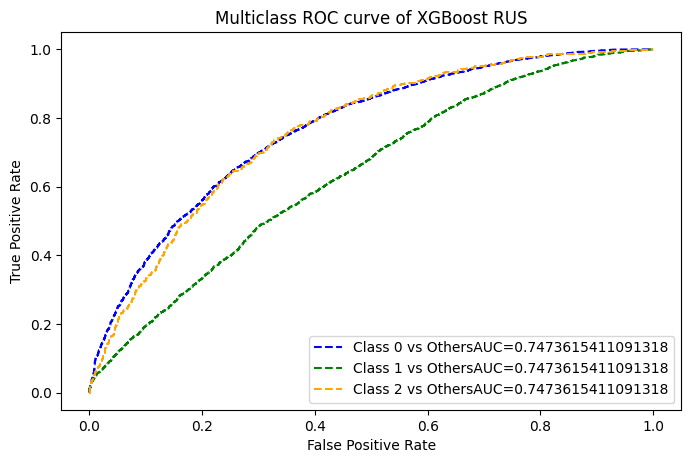

----- Evaluation on SMOTE data -------XGBoost SMOTE-----
---------------Test data ---------------

Confusion matrix 

[[10012   590    98]
 [ 1469   576   163]
 [  289   140    46]]
              precision    recall  f1-score   support

           0       0.85      0.94      0.89     10700
           1       0.44      0.26      0.33      2208
           2       0.15      0.10      0.12       475

    accuracy                           0.79     13383
   macro avg       0.48      0.43      0.45     13383
weighted avg       0.76      0.79      0.77     13383



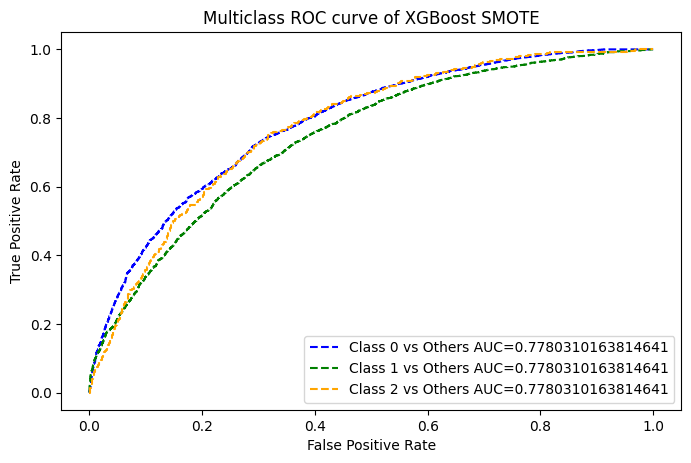

[{'Model_Name': 'XGBoost RUS',
  'Train_Accuracy': 0.9836670179135932,
  'Train_Recall': 0.9836670179135932,
  'Train_Precision': 0.9837693110888073,
  'Train_F1score': 0.9836640812945763,
  'Train_AUC': 0.9993854566746724,
  'Test_Accuracy': 0.5803631472763954,
  'Test_Recall': 0.5803631472763954,
  'Test_Precision': 0.7699077560529277,
  'Test_F1score': 0.6483413150436999,
  'Test_AUC': 0.7473615411091318},
 {'Model_Name': 'XGBoost SMOTE',
  'Train_Accuracy': 0.9112658286995935,
  'Train_Recall': 0.9112658286995935,
  'Train_Precision': 0.9140865581965473,
  'Train_F1score': 0.909597888962026,
  'Train_AUC': 0.983419870140343,
  'Test_Accuracy': 0.7945901516849735,
  'Test_Recall': 0.7945901516849735,
  'Test_Precision': 0.7581865139216636,
  'Test_F1score': 0.770751884380837,
  'Test_AUC': 0.7780310163814641}]

In [ ]:
# Model evaluation of XGB
xgb_eval_list = model_evaluation('XGBoost RUS', 'XGBoost SMOTE', xgb_rus, xgb_smote, x_train_rus, y_train_rus, x_train_smote, y_train_smote, X_test, y_test)
xgb_eval_list

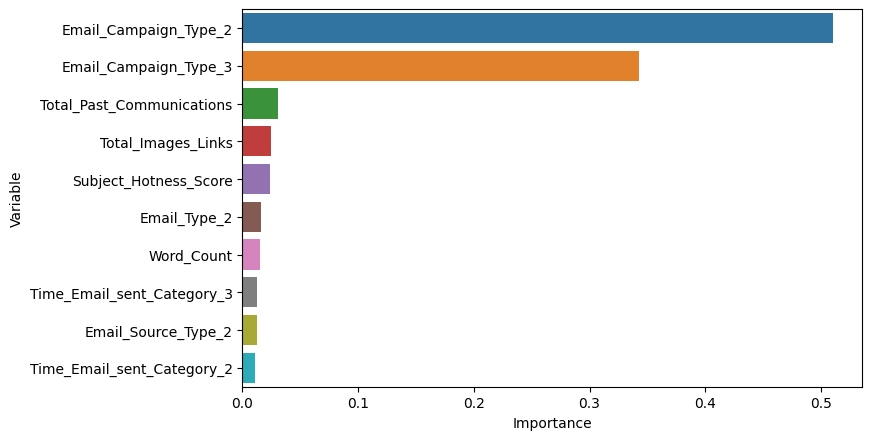

In [ ]:
# Visualising feature importance of XGBoost Classifier 
feature_imp_xgb = pd.DataFrame({"Variable": x_train_smote.columns,"Importance": xgb_smote.feature_importances_})
feature_imp_xgb.sort_values(by="Importance", ascending=False, inplace = True)
sns.barplot(x=feature_imp_xgb['Importance'], y= feature_imp_xgb['Variable'])

In [ ]:
# Updating the results list
add_list_to_final_df(xgb_eval_list)
# Having a look at our final comparison dataframe
comparison_df

,Model_Name,Train_Accuracy,Train_Recall,Train_Precision,Train_F1score,Train_AUC,Test_Accuracy,Test_Recall,Test_Precision,Test_F1score,Test_AUC
0,Logistic Regression RUS,0.533720,0.533720,0.517679,0.506365,0.724284,0.627737,0.627737,0.767629,0.680816,0.767966
1,Logistic Regression SMOTE,0.533332,0.533332,0.516799,0.508567,0.721570,0.628409,0.628409,0.767106,0.681338,0.769431
2,Decision Tree RUS,0.999298,0.999298,0.999299,0.999298,0.999999,0.493088,0.493088,0.747647,0.573412,0.616647
3,Decision Tree SMOTE,0.999408,0.999408,0.999409,0.999408,1.000000,0.693940,0.693940,0.726473,0.709021,0.607367
4,KNN RUS,0.660695,0.660695,0.661665,0.657477,0.847564,0.593664,0.593664,0.753675,0.653103,0.702959
5,KNN SMOTE,0.882459,0.882459,0.890850,0.879947,0.983538,0.599044,0.599044,0.749406,0.654299,0.677678
6,Random Forest RUS,0.557078,0.557078,0.548266,0.531737,0.754514,0.647314,0.647314,0.775192,0.695424,0.777281
7,Random Forest SMOTE,0.559592,0.559592,0.542196,0.533770,0.757066,0.677800,0.677800,0.770892,0.713641,0.773656
8,Random Forest Tuned RUS,0.766948,0.766948,0.769605,0.766291,0.924141,0.621535,0.621535,0.778812,0.679862,0.770906
9,Random Forest Tuned SMOTE,0.911188,0.911188,0.911247,0.910639,0.984763,0.749533,0.749533,0.762085,0.755483,0.768420


### Comparison of all the Models

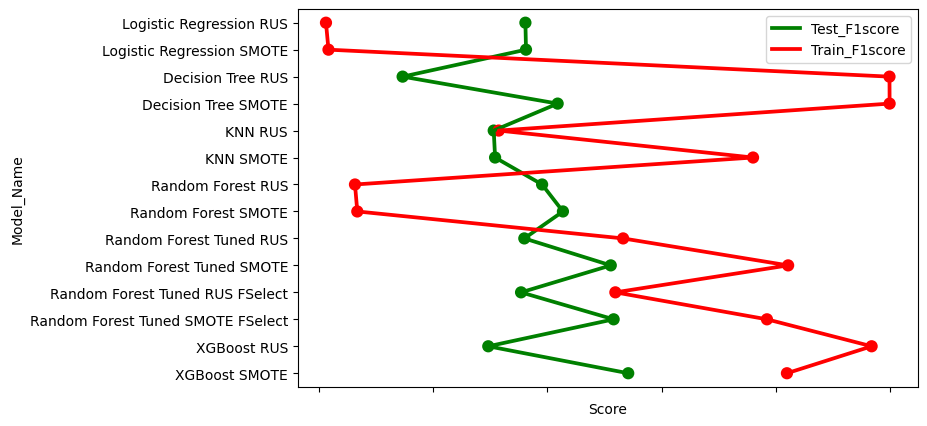

In [ ]:
# Visualizing comparison of f1 score for all models
# Creating subplots
ax = plt.subplots()

ax = sns.pointplot(y=comparison_df['Model_Name'], x = comparison_df['Test_F1score'], color='g', labels=('Test_F1score')) 
ax = sns.pointplot(y=comparison_df['Model_Name'], x = comparison_df['Train_F1score'], color='r', labels=('Train_F1score')) 

# Renaming the axes
ax.set(xlabel="Score", ylabel="Model_Name")
ax.legend(handles=ax.lines[::len(comparison_df)+1], labels=["Test_F1score","Train_F1score"])

ax.set_xticklabels([t.get_text().split("T")[0] for t in ax.get_xticklabels()])
# Visulaizing illustration
plt.show()

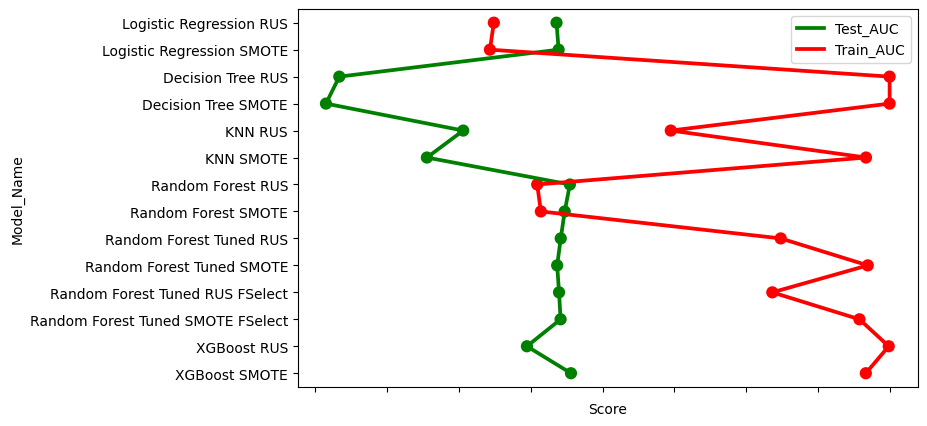

In [ ]:
# Visualizing comparison of auc score for all models
# Creating subplots
ax = plt.subplots()

ax = sns.pointplot(y=comparison_df['Model_Name'], x = comparison_df['Test_AUC'], color='g', labels=('Test_AUC'))
ax = sns.pointplot(y=comparison_df['Model_Name'], x = comparison_df['Train_AUC'], color='r', labels=('Train_AUC'))

# Renaming the axes
ax.set(xlabel="Score", ylabel="Model_Name")
ax.legend(handles=ax.lines[::len(comparison_df)+1], labels=["Test_AUC","Train_AUC"])

ax.set_xticklabels([t.get_text().split("T")[0] for t in ax.get_xticklabels()])
# Visulaizing illustration
plt.show()

## **Conclusions**

* It could be observed from the EDA that **Email_Campaign_Type** was the **most important** feature. If the Email_Campaign_Type was **1**, there is a **90%** likelihood of your Email to be **acknowledged**.

* It was observed that both **Time_Email_Sent and Customer_Location** were insignificant in determining the **Email_status**. The ratio of the Email_Status was same **irrespective** of the time frame the emails were sent on.

* As the **word_count** increases beyond the **600** mark we see that there is a **high** possibility of that email being **ignored**. The ideal mark was **400-600**.

* For modelling, it was observed that for **imbalance handling** Oversampling i.e. **SMOTE** worked way better than **undersampling** as the latter resulted in a lot of loss of information.

* **Decision Tree Model** was **overfitting** as it was working really good on train data but bad on test data.

* **Hyperparameter tuning** wasn't able to improve the results to a better extent and casused a lot computaional time.

* **XGBoost Algorithm** worked in the **best** way possible with such an imbalanced data having outliers, followed by Random Forest Hyperparameter Tuned model after feature selection with F1 Score of 0.75 on the test set.